# Mini-Project I
During this project, we will practice handling of complex lists and dictionaries in Python. Plus, we will learn how to work with API documentation. Don't be afraid to search for the information in the [**documentation**](https://api.tfl.gov.uk/swagger/ui/index.html?url=/swagger/docs/v1#!/AccidentStats/AccidentStats_Get).

Let's go to the tasks, we have some parsing to do :)!!

In [1]:
# import packages we need (remember what packages we used yesterday during the API session)
# IMPORT HERE
import requests as re
import os
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [2]:
# BASE URL
url = "https://api.tfl.gov.uk/"

## Task
Parse the dictionary and print the AirQuality predictions for tomorrow

In [19]:
res_aq = re.get(url+'/AirQuality')

aq_data = res_aq.json()

print('Air Quality Conditions')
print('----')
print(aq_data['currentForecast'][1]['forecastSummary'])

Air Quality Conditions
----
Low air pollution forecast valid from Saturday 25 July to end of Saturday 25 July GMT


In [31]:
lines = aq_data['currentForecast'][1]['forecastText'].replace('&lt;','').replace('br/', '').replace('&gt;', '').replace('&#39;Low&#39;', '').split('.')
print(lines[0], '.')

Saturday is forecast to be overcast with occasional showers .


## Task
What are the different modes of transport which are operated by Transfer for London? How many of modes do they have?

Print the list with different modes of transport, plus their count. Example output:
```
[bus, cable-car,.....]
Number of different modes of transport is: xyz
```

We need to search the documentation for correct request.

In [3]:
res_line = re.get(url+'/Line/Meta/Modes')

# A list of dicts
line_data = res_line.json()

different_modes_transport = [mode['modeName'] for mode in line_data]

In [5]:
print(different_modes_transport)
print('----')
print(f"Number of different modes of transport is: {len(different_modes_transport)}")

['bus', 'cable-car', 'coach', 'cycle', 'cycle-hire', 'dlr', 'interchange-keep-sitting', 'interchange-secure', 'national-rail', 'overground', 'replacement-bus', 'river-bus', 'river-tour', 'taxi', 'tflrail', 'tram', 'tube', 'walking']
----
Number of different modes of transport is: 18


## Task
How many BikePoints in London are operated by Transfor for London? How many docks are in **all** BikePoints? There is the information for empty and full docks for each BikePoint.

In [3]:
res_bike = re.get(url+'/BikePoint')

list_of_bikepoints = res_bike.json()

# Returns a list of all the different bikepoints

In [4]:
# Total available bikes
av_bikes = 0

for item in list_of_bikepoints:
    value = item['additionalProperties'][-3]['value']
    av_bikes += int(value)

    
print(f'At this time of writing, there are {av_bikes} total available bikes in all Bike points.')

At this time of writing, there are 8820 total available bikes in all Bike points.


In [5]:
# Empty Docks
empty_docks = 0

for item in list_of_bikepoints:
    value = item['additionalProperties'][-2]['value']
    empty_docks += int(value)

    
print(f'At this time of writing, there are {empty_docks} total empty docks in all Bike points.')

At this time of writing, there are 11522 total empty docks in all Bike points.


In [7]:
# Total Docks
total_docks = 0

for item in list_of_bikepoints:
    value = item['additionalProperties'][-1]['value']
    total_docks += int(value)

    
print(f'There are {total_docks} total bike docks.')

There are 20788 total bike docks.


In [40]:
print(f'Number of bike points: {len(list_of_bikepoints)} throughout the city of london.')

Number of bike points: 783 throughout the city of london.


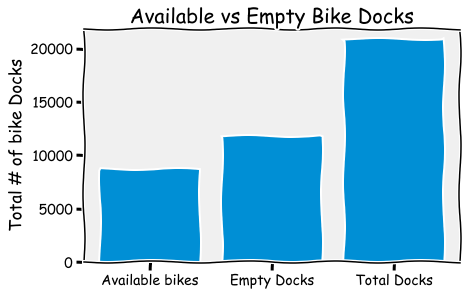

In [60]:
plt.xkcd()

plt.title('Available vs Empty Bike Docks')

plt.ylabel('Total # of bike Docks')
plt.bar(['Available bikes', 'Empty Docks', 'Total Docks'], [av_bikes, empty_docks, total_docks]);

## Task
How many tube and bus lines are in London? Print names of all tube lines.

In [52]:
# Tube Data
res_tube_reg = re.get(url + '/Line/Mode/tube/Route').json()

# Bus Data
res_bus_reg = re.get(url + '/Line/Mode/bus/Route').json()

In [53]:
print(f'There are {len(res_tube_reg)} tube lines in London')
print(f'There are {len(res_bus_reg)} bus routes in London')

There are 11 tube lines in London
There are 609 bus routes in London


In [20]:
res_tube = re.get(url+'/Line/Mode/tube').json()

tubeline_names = [line['name'] for line in res_tube]

print('Names of all tube lines: ', tubeline_names)

Names of all tube lines:  ['Bakerloo', 'Central', 'Circle', 'District', 'Hammersmith & City', 'Jubilee', 'Metropolitan', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo & City']


## Task
How many station has `victoria` line?

In [21]:
res = re.get(url+'/Line/victoria/Route/Sequence/inbound', params={'excludeCrowds': True}).json()

print(f'There are {len(res["stations"])} stations within the Victoria line.')

There are 16 stations within the Victoria line.


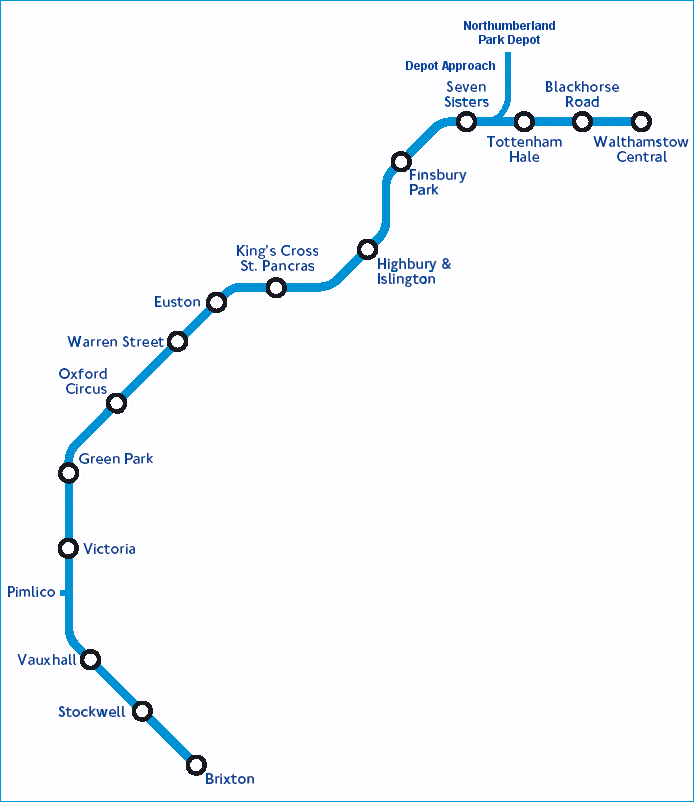

In [56]:
Image("http://jayonlife.com/wp-content/uploads/2014/02/01.gif", width=400, height=650)

## Task
Plan the journey from Heathrow Airport to Tower Bridge using Public Transport, Taxi or Bike? Which way is the fastest? Example output:
```
Planned duration:
Public Transport: x minutes
Bike: y minutes
```

We need to search the documentation for correct requests.

In [8]:
res_journey_modes = re.get(url+'/Journey/Meta/Modes').json()
modes = [mode['modeName'] for mode in res_journey_modes]
print('Different Modes of Transportation')
print('---')
print(modes)

Different Modes of Transportation
---
['black-cab-as-customer', 'black-cab-as-driver', 'bus', 'cable-car', 'coach', 'cycle', 'cycle-hire', 'dlr', 'electric-car', 'goods-vehicle-as-driver', 'interchange-keep-sitting', 'interchange-secure', 'international-rail', 'motorbike-scooter', 'national-rail', 'overground', 'plane', 'private-car', 'private-coach-as-customer', 'private-coach-as-driver', 'private-hire-as-customer', 'private-hire-as-driver', 'replacement-bus', 'river-bus', 'river-tour', 'taxi', 'tflrail', 'tram', 'tube', 'walking']


In [10]:
#Create a function that returns a tuple (lat, lon) of a specific location
def get_lat_lon(location):
    res_ha = re.get(url+'/Place/Search/', params={'name': location}).json()
    lat_lon = (res_ha[0]['lat'], res_ha[0]['lon'])
    
    return lat_lon

print('lat, lon coordinates for Heathrow Airport: ', get_lat_lon('Heathrow Airport'))
print('lat, lon coordinates for Tower Bridge: ',get_lat_lon('Tower Bridge'))

lat, lon coordinates for Heathrow Airport:  (51.472916, -0.452295)
lat, lon coordinates for Tower Bridge:  (51.509, -0.07368)


In [32]:
# Setting params for each type of travel
public_transport_params = {'mode': 'bus', 
                           'journeyPreference': 'leasttime'}

tube_transport_params = {'mode': 'tube'}

bike_params = {'mode':'motorbike-scooter'}

taxi_params = {'taxiOnlyTrip': True, 
               'mode': 'taxi'}

# From and to locations
from_location = 'Heathrow Airport'
to_location = 'Tower Bridge'

# Get lat/lon coordinates
ha_latlon = get_lat_lon(from_location) 
tb_latlon = get_lat_lon(to_location)

# Sending API get request and parsing it
public_transport_data = re.get(url + f'/Journey/JourneyResults/{ha_latlon[0]}%2C%20{ha_latlon[1]}/to/{tb_latlon[0]}%2C%20{tb_latlon[1]}', params = public_transport_params).json()

taxi_data = re.get(url + f'/Journey/JourneyResults/{ha_latlon[0]}%2C%20{ha_latlon[1]}/to/{tb_latlon[0]}%2C%20{tb_latlon[1]}', params=taxi_params).json()

bike_data = re.get(url + f'/Journey/JourneyResults/{ha_latlon[0]}%2C%20{ha_latlon[1]}/to/{tb_latlon[0]}%2C%20{tb_latlon[1]}', params=bike_params).json()

tube_data = re.get(url + f'/Journey/JourneyResults/{ha_latlon[0]}%2C%20{ha_latlon[1]}/to/{tb_latlon[0]}%2C%20{tb_latlon[1]}?mode=tube').json()

In [33]:
public_transport_duration = public_transport_data['journeys'][0]['duration']
public_transport_duration

161

In [34]:
taxi_transport_duration = taxi_data['journeys'][0]['duration']
taxi_transport_duration

78

In [35]:
bike_transport_duration = bike_data['journeys'][0]['duration']
bike_transport_duration

84

In [39]:
tube_duration = tube_data['journeys'][0]['duration']

In [42]:
print(f'Bus Time: {public_transport_duration} minutes')
print(f'Taxi Travel Time: {taxi_transport_duration} minutes')
print(f'Motorbike-scooter Travel Time: {bike_transport_duration} minutes')
print(f'Tube Travel Time: {tube_duration} minutes')

Bus Time: 161 minutes
Taxi Travel Time: 78 minutes
Motorbike-scooter Travel Time: 84 minutes
Tube Travel Time: 83 minutes


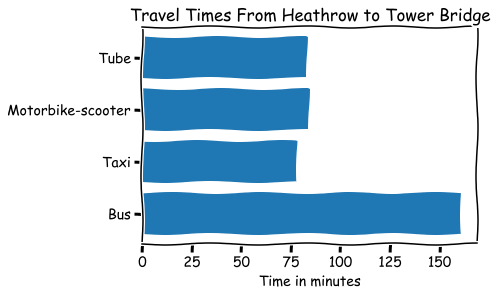

In [43]:
plt.xkcd()
plt.title('Travel Times From Heathrow to Tower Bridge')
plt.xlabel('Time in minutes')
plt.barh(['Bus', 'Taxi', 'Motorbike-scooter', 'Tube'], [public_transport_duration, taxi_transport_duration, bike_transport_duration, tube_duration]);

In [6]:
def get_journey(from_location, to_location):
    # Create latlon function
    def get_lat_lon(location):
        res_ha = re.get(url+'/Place/Search/', params={'name': location}).json()
        lat_lon = (res_ha[0]['lat'], res_ha[0]['lon'])
        return lat_lon
    
    from_latlon = get_lat_lon(from_location)
    to_latlot = get_lat_lon(to_location)
    
    res = re.get(url + f'/Journey/JourneyResults/{from_latlon[0]}%2C%20{from_latlon[1]}/to/{to_latlot[0]}%2C%20{to_latlot[1]}?mode=black-cab-as-driver').json()
    duration = res['journeys'][0]['duration']
    count = 1
    print(f'Total travel time: {duration} minutes\n')
    
    print('DIRECTIONS')
    print('==========')
    for d in res['journeys'][0]['legs']:
        print(f'\n {count}: ',d['instruction']['summary'])
        print('--------')
        count += 1
        for x in d['instruction']['steps']:
            print(x['description'])

In [7]:
get_journey('Heathrow Airport', 'Tower Bridge')

Total travel time: 84 minutes

DIRECTIONS

 1:  Walk to Heathrow Terminals 2 & 3 Underground Station
--------
Calshot Road for 321 metres
on to Inner Ring East, continue for 60 metres
on to Inner Ring West, continue for 95 metres
on to Cromer Road West, continue for 40 metres
on to Camborne Crescent, continue for 62 metres

 2:  Piccadilly line to Hammersmith (Dist&Picc Line)
--------

 3:  District line to Tower Hill
--------

 4:  Walk to 1 St Katharine's Way, Tower Hamlets
--------
 for 123 metres
on to Minories, continue for 17 metres
on to Tower Hill, continue for 90 metres
for 17 metres
on to Tower Bridge Approach, continue for 10 metres
for 6 metres
on to St Katharine's Way, continue for 2 metres


In [8]:
# To big ben!
# Westminster Bridge

get_journey('Tower Bridge', 'Westminster Bridge')

Total travel time: 27 minutes

DIRECTIONS

 1:  Walk to Tower Hill
--------
St Katharine's Way for 2 metres
for 6 metres
on to Tower Bridge Approach, continue for 10 metres
for 17 metres
on to Tower Hill, continue for 90 metres
on to Minories, continue for 17 metres
for 125 metres

 2:  District line or Circle line to Monument
--------

 3:  Walk to Bank
--------

 4:  Northern line to Elephant & Castle
--------

 5:  Bakerloo line to Lambeth North
--------

 6:  Walk to 1 Kennington Road, Lambeth
--------
Westminster Bridge Road for 17 metres
on to Kennington Road, continue for 22 metres


### What are the travel times throughout the day using different modes of transportation

In [56]:
timeseries = ['00:00', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']

for i in range(len(timeseries)):
    timeseries[i]
    timeseries[i] = timeseries[i].replace(':','')
    
timeseries

['0000',
 '0100',
 '0200',
 '0300',
 '0400',
 '0500',
 '0600',
 '0700',
 '0800',
 '0900',
 '1000',
 '1100',
 '1200',
 '1300',
 '1400',
 '1500',
 '1600',
 '1700',
 '1800',
 '1900',
 '2000',
 '2100',
 '2200',
 '2300']

In [50]:
ha_latlon = get_lat_lon('Heathrow Airport')
tb_latlon = get_lat_lon('Tower Bridge')

bus_times = []
tube_times = []
bike_times = []
taxi_times = []

modes = ['tube', 'motorbike-scooter', 'taxi', 'bus']

for mode in modes:
    for depart_time in timeseries:
        if mode == 'taxi':
            travel_params = {'time': depart_time, 
                            'timels': 'departing',
                            'mode': mode, 
                            'taxiOnlyTrip': True}
        else:
            travel_params = {'time': depart_time, 
                        'timels': 'departing',
                        'mode': mode}

        try:
            res = re.get(url + f'/Journey/JourneyResults/{ha_latlon[0]}%2C%20{ha_latlon[1]}/to/{tb_latlon[0]}%2C%20{tb_latlon[1]}', params = travel_params).json()
            duration = res['journeys'][0]['duration']
            
            if mode == 'bus':
                bus_times.append(duration)
            elif mode == 'tube':
                tube_times.append(duration)
            elif mode == 'motorbike-scooter':
                bike_times.append(duration)
            elif mode == 'taxi':
                taxi_times.append(duration)
                
        except:
            break

In [57]:
len(tube_times), len(bike_times), len(taxi_times), len(bus_times)

(24, 24, 24, 24)

In [60]:
timeseries = [time[:2] for time in timeseries]
timeseries

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

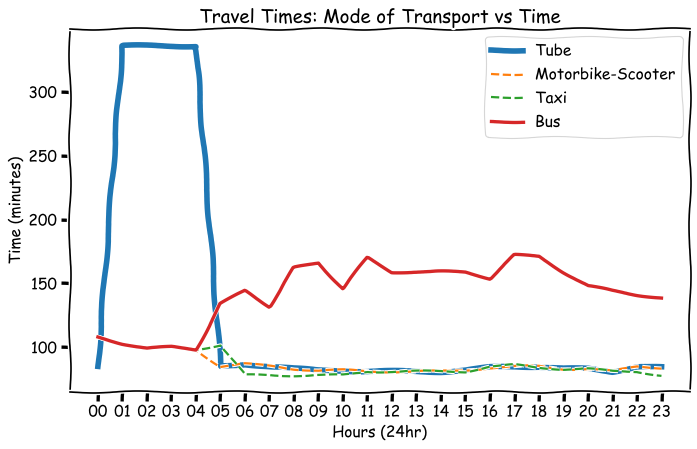

In [93]:
plt.xkcd()

plt.figure(figsize=(10, 6), dpi=80);

plt.plot(timeseries, tube_times, linewidth=5,label='Tube')
plt.plot(timeseries, bike_times, linestyle='--',label='Motorbike-Scooter')
plt.plot(timeseries, taxi_times, linestyle='--',label='Taxi')
plt.plot(timeseries, bus_times, linewidth=3, label='Bus');

plt.title('Travel Times: Mode of Transport vs Time')
plt.xlabel('Hours (24hr)')
plt.ylabel('Time (minutes)')


plt.legend();

##### "Underground trains generally run between 5am and midnight, Monday to Saturday, with reduced operating hours on Sunday."
source: https://www.visitlondon.com/traveller-information/getting-around-london/london-tube